In [ ]:
import numpy as np
from keras import datasets
from keras import models,layers
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


# 1. DataLoader
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

#print(X_train[0])
#print(X_test[0])
#print(X_train[0].shape)
#print(X_train.shape)
#print(X_test.shape)

plt.imshow(X_train[0],cmap="gray")

# 숫자 1,3을 구분하는 것보다는 바지와 신발을 구분하는 것이 더 복잡할 수 있다.
# 어제 작업을 바탕으로 오늘은 이미지 정확도 결과를 97% 이상으로 끌어올리는 것을 목표로 잡자.

# 2. 데이터 입력 전 전처리 과정
# 1) 1차원으로 펼차기 2) /255 3) 원핫인코딩
L,H,W = X_train.shape # 3차원으로 출력된다.... 60000,28,28
X_train = X_train.reshape(-1,H*W)
X_test = X_test.reshape(-1,H*W)

print(X_train.shape, X_test.shape)

# 2) 스케일링
X_train = X_train/255
X_test = X_test/255

#print(X_train[0])

# 3) one hot encoding
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

#print(Y_train[0])

# 3. 모델 생성...히든 레이어를 2개만 생성
model = models.Sequential()
model.add(layers.Dense(100,activation="relu", input_shape=(W*H,)))
model.add(layers.Dropout(0.5)) # pruning과 같은 가지치기
model.add(layers.Dense(50,activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10,activation="softmax"))

# 4. compile
model.compile("sgd","categorical_crossentropy","accuracy")

# 5. fit
model.fit(X_train, Y_train, epochs=20, batch_size=100, validation_split = 0.2)

# 6.
performance = model.evaluate(X_test,Y_test, batch_size =100)

## 모델 생성 부분
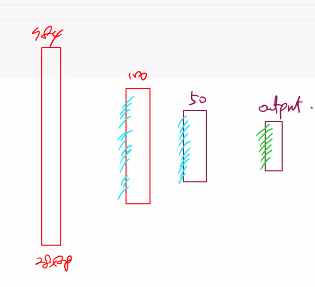

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history["loss"]) # history 안에 history에 들어가야 dict값을 받을 수 있음
    plt.plot(history.history["val_loss"])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train","Validation"])

def plot_acc(history):
    plt.plot(history.history["accuracy"]) # history 안에 history에 들어가야 dict값을 받을 수 있음
    plt.plot(history.history["val_accuracy"])
    plt.title("Model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train","Validation"])

# fit...학습할 때 나오는 로그메시지들을 다 모아서 리턴한다...history
history = model.fit(X_train, Y_train, epochs= 50, batch_size=100, validation_split=0.2)

In [ ]:
plot_loss(history)

In [ ]:
plot_acc(history)

### 다시 이미지 데이터 Plotting 시켜놓기

In [ ]:
# 1차원으로 펼친 데이터를 다시 2차원으로 만들어놓아야 한다.

#plt.imshow(X_train[0],cmap="gray")
X_train[0]

'''
interpolation은 결측값에 대해서 어떤 처리를 해줄지를 지정하는 옵션
우리는 지금 이런 옵션이 전혀 필요가 없다.
이 데이터는 이미지이기 때문에 누락 데이터가 있을 수 없다.
0~255의 값을 가지고 있다.
'''
plt.imshow(X_train[0].reshape(28,28), interpolation="none",cmap="gray")
#plt.imshow(X_train[100].reshape(28,28), interpolation="none",cmap="gray")
#plt.imshow(X_train[1020].reshape(28,28), interpolation="none",cmap="gray")
#plt.imshow(X_train[10923].reshape(28,28), interpolation="none",cmap="gray")

In [ ]:
model.summary()

In [ ]:
### 지금까지 학습한 weight 값 저장하기
### hdf5 파일로 저장

model.save("C:\encore_PJY\model.h5")